## Oxford-IIT Pet Dataset

[Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by O. M. Parkhi et al., 2012 which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories

In [2]:
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
URLs.PETS #url for dataset

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [5]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [7]:
print(path)
path.ls()

/root/.fastai/data/oxford-iiit-pet


[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [8]:
path_anno = path/'annotations'
path_img = path/'images'
path_anno

PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')

In [9]:
fnames = get_image_files(path_img)
fnames[:4]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_152.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_19.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_156.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_82.jpg')]

In [10]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'  # (re) pattern to extract label from filename using from_name_re

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
data=ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224 ,bs=64)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Maine_Coon,Sphynx,english_setter,wheaten_terrier,yorkshire_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,american_bulldog,havanese,pomeranian,Siamese
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

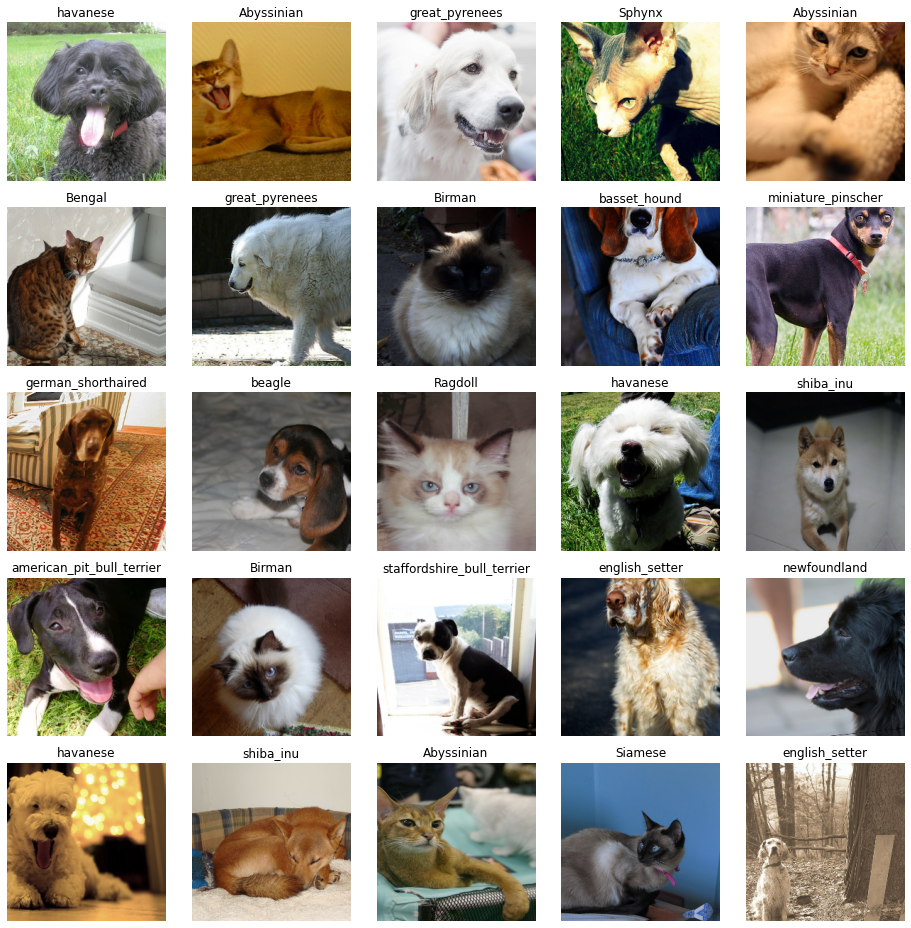

In [83]:
data.show_batch(rows=5, figsize=(13,13))

In [14]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [15]:
len(data.classes)

37

# Training

In [44]:
doc(cnn_learner)

In [85]:
classifier=cnn_learner(data , models.resnet34 , metrics = error_rate)

In [86]:
classifier.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [87]:
classifier.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.423823,0.332050,0.112991,01:47
1,0.633376,0.255785,0.086604,01:47
2,0.401417,0.210042,0.068336,01:48
3,0.289888,0.206218,0.066982,01:47


In [89]:
classifier.save('petsclf')

In [90]:
interpreter = ClassificationInterpretation.from_learner(classifier)

In [91]:
losses,idxs = interpreter.top_losses()
print(len(losses))
len(data.valid_ds)==len(losses)==len(idxs)

1478


True

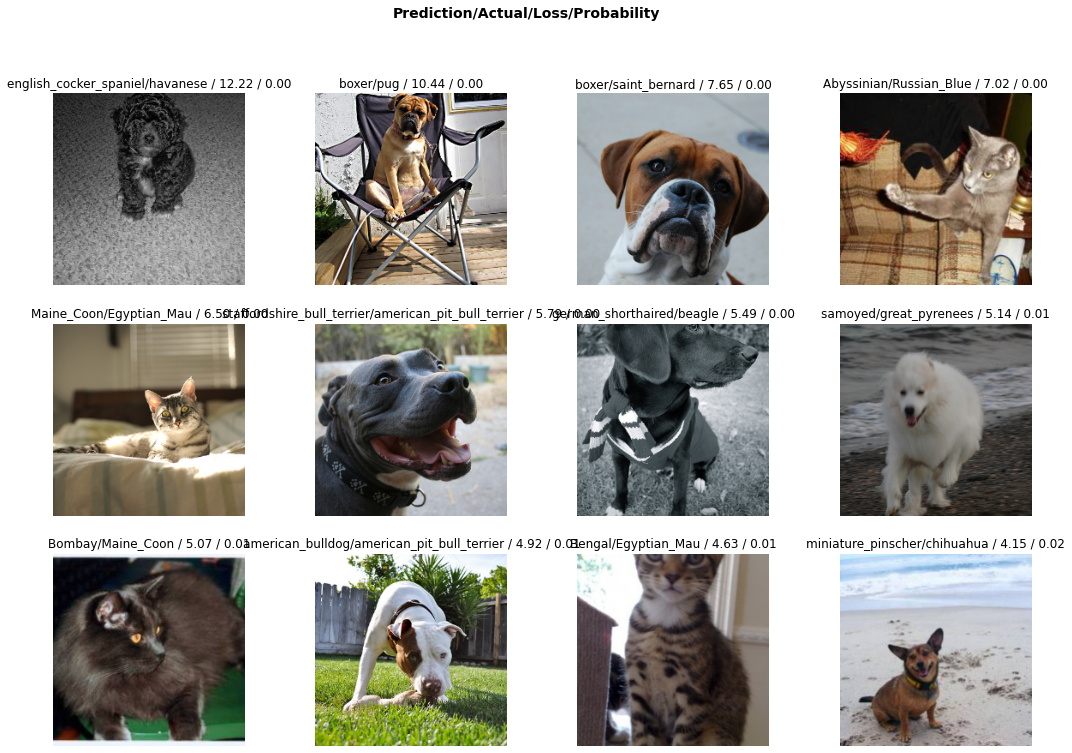

In [92]:
interpreter.plot_top_losses(12, figsize=(18,12))

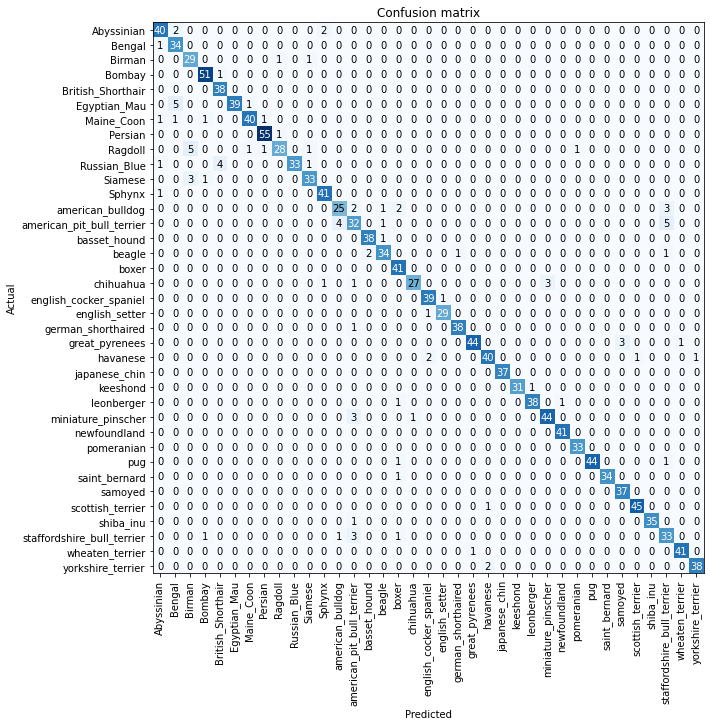

In [93]:
interpreter.plot_confusion_matrix(figsize=(10,10))

In [95]:
classifier.path


PosixPath('/root/.fastai/data/oxford-iiit-pet/images')

In [ ]:
from sklearn.externals import joblib
joblib.dump(model, 'pets1.pkl') 

In [61]:
interpreter.most_confused(2)

[('Ragdoll', 'Birman', 10),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('beagle', 'basset_hound', 7),
 ('samoyed', 'great_pyrenees', 5),
 ('yorkshire_terrier', 'havanese', 5),
 ('Bengal', 'Abyssinian', 4),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Maine_Coon', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'american_bulldog', 2)]

lets unfreeze and train the model

In [96]:
classifier.load('petsclf');

In [97]:
classifier.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


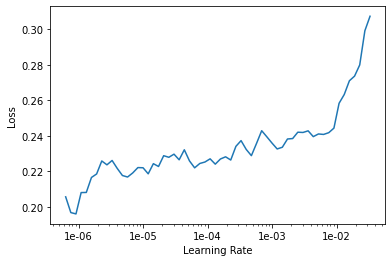

In [98]:
classifier.recorder.plot()

In [99]:
classifier.unfreeze()

In [100]:
classifier.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.245221,0.199743,0.062246,01:56
1,0.216577,0.193368,0.062246,01:55


In [102]:
classifier.save('petsclf2')

# Resnet50

In [103]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=32).normalize(imagenet_stats)

In [105]:
clf = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


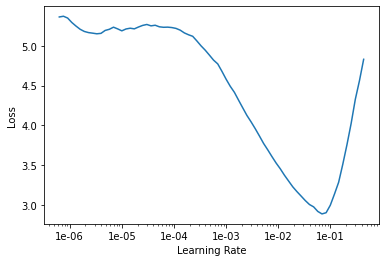

In [106]:
clf.lr_find()
clf.recorder.plot()

In [107]:
clf.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.730270,0.343224,0.100812,03:18
1,0.525888,0.273270,0.083221,03:18
2,0.398057,0.220915,0.066982,03:14
3,0.314175,0.211852,0.071042,03:14
4,0.181596,0.170656,0.056834,03:14
5,0.130986,0.159155,0.050744,03:14


In [109]:
clf.save('pets50')

In [110]:
clf.unfreeze()
clf.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.118192,0.161117,0.049391,04:16
1,0.125411,0.156724,0.049391,04:16
2,0.098937,0.154756,0.049391,04:16


In [111]:
 interpret = ClassificationInterpretation.from_learner(clf)

In [112]:
interpret.most_confused(2)

[('Ragdoll', 'Birman', 8),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Birman', 'Ragdoll', 2),
 ('Persian', 'Ragdoll', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'staffordshire_bull_terrier', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [115]:
joblib.dump(clf,'pets-res50.pkl') 

TypeError: ignored